# Students Performance in Exams

In [1]:
# gender : sex of students
# race/ethnicity : ethnicity of students
# parental level of education : parents' final education
# lunch : having lunch before test (normal or abnormal)
# test preparation course : complete or not complete before test
# math/writing/reading score: score for three subjects

Importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Reading data

In [3]:
data = pd.read_csv('StudentsPerformance.csv')
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


Check data

In [4]:
data.shape

(1000, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Creating a column to see average score of each student

In [7]:
data['average score'] = ((data['math score'] + data['reading score'] + 
                         data['writing score']) / 3).round()
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0
5,female,group B,associate's degree,standard,none,71,83,78,77.0
6,female,group B,some college,standard,completed,88,95,92,92.0
7,male,group B,some college,free/reduced,none,40,43,39,41.0
8,male,group D,high school,free/reduced,completed,64,64,67,65.0
9,female,group B,high school,free/reduced,none,38,60,50,49.0


In [8]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

# Data Visualisation

Function which will help group graphs

In [9]:
def bar(dt, x_cols, y_cols):
    n = 1
    x_cnt = len(x_cols)
    y_cnt = len(y_cols)
    figure = plt.figure(figsize=(17, 5 * x_cnt))
    for x_ax in x_cols:
        for i in y_cols:
            ax = figure.add_subplot(x_cnt, y_cnt, n)
            g = sns.barplot(x = dt[x_ax], y = dt[i])
            g.set_xticklabels(g.get_xticklabels(), rotation=45)
            n = n + 1

Performance based on genders and race/ethnicity

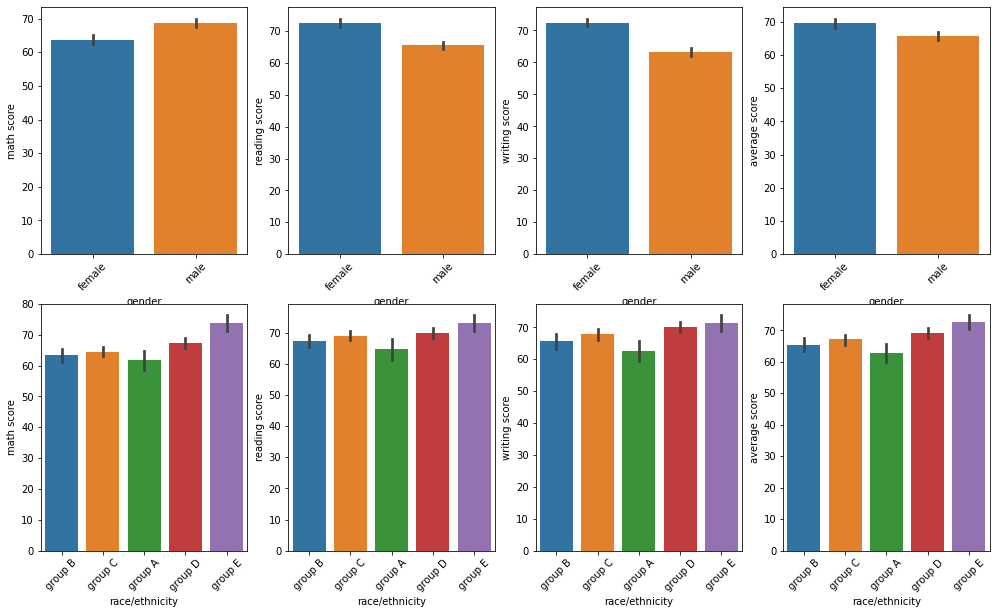

In [10]:
y_cols = ['math score', 'reading score', 'writing score', 'average score']
x_cols = ['gender', 'race/ethnicity']
bar(data, x_cols, y_cols)

We can see that male has better performance on math field, but worse on reading and writing. While female do better at reading and writing. Group E has best performance for all the fields, and group A is the worst.

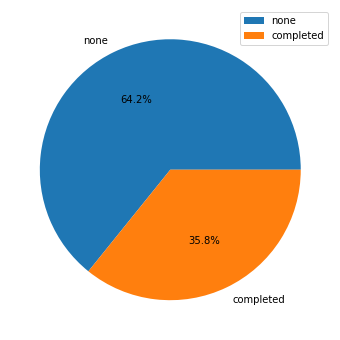

In [11]:
count_test = data['test preparation course'].value_counts()
labels = data['test preparation course'].value_counts().index
plt.figure(figsize=(6, 6))
plt.pie(count_test, labels=labels, autopct='%1.1f%%')
plt.legend(labels)
plt.show()

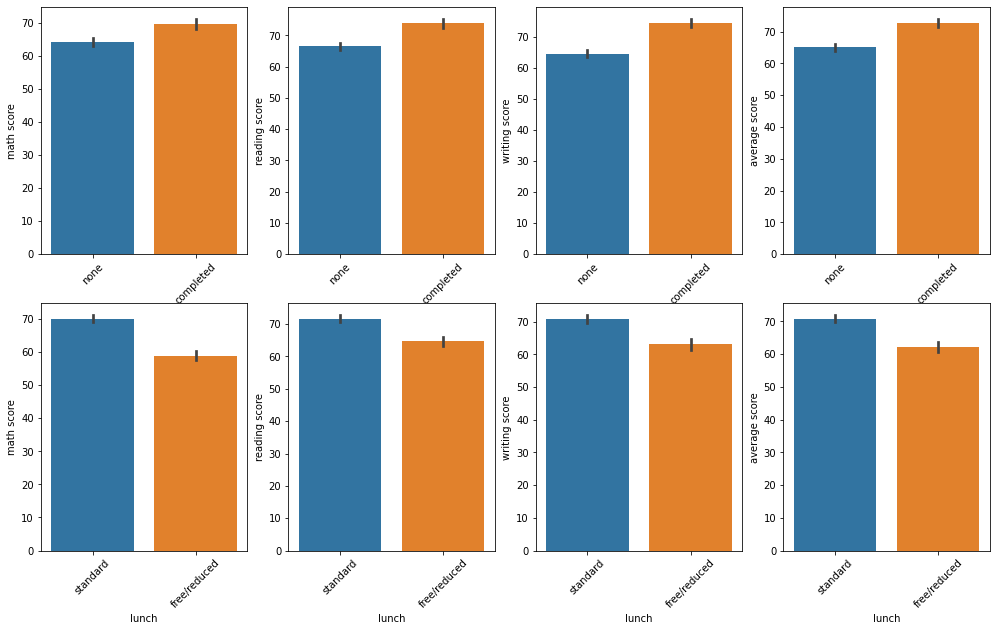

In [12]:
y_cols = ['math score', 'reading score', 'writing score', 'average score']
x_cols = ['test preparation course', 'lunch']
bar(data, x_cols, y_cols)

As we can see score distribution gets higher if student completes the preparation course

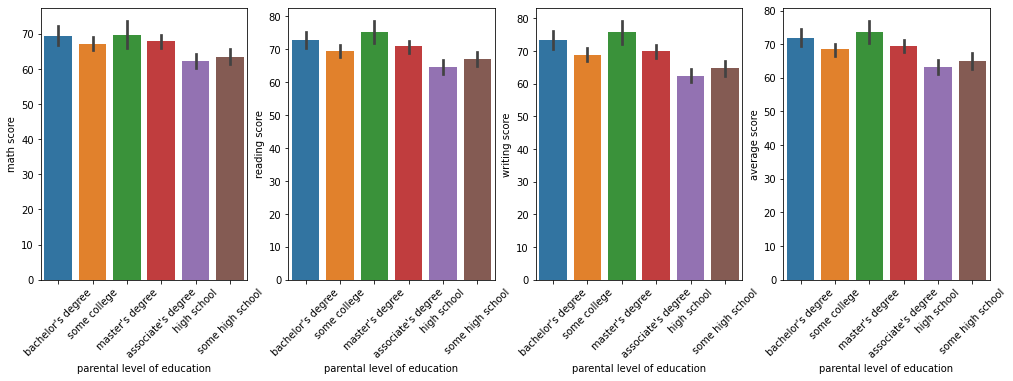

In [13]:
y_cols = ['math score', 'reading score', 'writing score', 'average score']
x_cols = [ 'parental level of education']
bar(data, x_cols, y_cols)

Barchar above shows that student, whos parents have finished bachelor's or master's degree tend to have higher marks, average score being around 70-80%

Distribution of all scores

<AxesSubplot:xlabel='math score', ylabel='Density'>

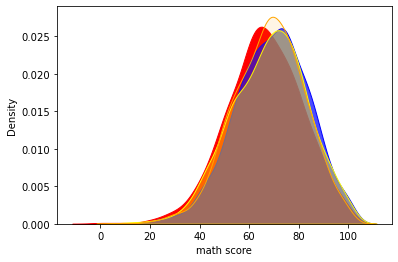

In [14]:
sns.kdeplot(data['math score'], shade=True, color="red", alpha=1)
sns.kdeplot(data['reading score'], shade=True, color="blue", alpha=0.7)
sns.kdeplot(data['writing score'], shade=True, color="yellow", alpha=0.4)
sns.kdeplot(data['average score'], shade=True, color='orange', alpha=0.1)

# Feature Engineering

Encode data for later usage

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['gender'] = encoder.fit_transform(data['gender'])
data['race/ethnicity'] = encoder.fit_transform(data['race/ethnicity'])
data['parental level of education'] = encoder.fit_transform(data['parental level of education'])
data['lunch'] = encoder.fit_transform(data['lunch'])
data['test preparation course'] = encoder.fit_transform(data['test preparation course'])
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,0,1,1,1,1,72,72,74,73.0
1,0,2,4,1,0,69,90,88,82.0
2,0,1,3,1,1,90,95,93,93.0
3,1,0,0,0,1,47,57,44,49.0
4,1,2,4,1,1,76,78,75,76.0
5,0,1,0,1,1,71,83,78,77.0
6,0,1,4,1,0,88,95,92,92.0
7,1,1,4,0,1,40,43,39,41.0
8,1,3,2,0,0,64,64,67,65.0
9,0,1,2,0,1,38,60,50,49.0


Heatmap to see the correlation

<AxesSubplot:>

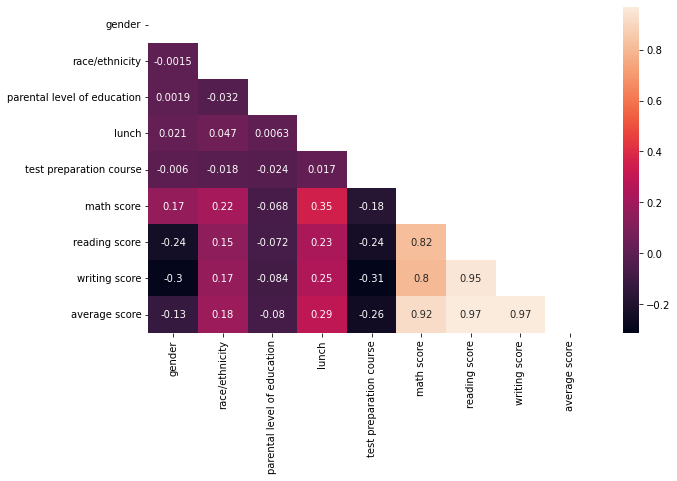

In [16]:
plt.figure(figsize=(10, 6))
correlation = data.corr()
m = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation), mask=m, annot=True)

Get y and x, change data once again for better accuracy

In [17]:
y = data['gender']
data.drop(["gender"], axis = 1, inplace = True)
data.columns

Index(['race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average score'],
      dtype='object')

Creating dummies

In [18]:
data = pd.get_dummies(data,columns = ["race/ethnicity", "lunch","parental level of education", "test preparation course"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   math score                     1000 non-null   int64  
 1   reading score                  1000 non-null   int64  
 2   writing score                  1000 non-null   int64  
 3   average score                  1000 non-null   float64
 4   race/ethnicity_0               1000 non-null   uint8  
 5   race/ethnicity_1               1000 non-null   uint8  
 6   race/ethnicity_2               1000 non-null   uint8  
 7   race/ethnicity_3               1000 non-null   uint8  
 8   race/ethnicity_4               1000 non-null   uint8  
 9   lunch_0                        1000 non-null   uint8  
 10  lunch_1                        1000 non-null   uint8  
 11  parental level of education_0  1000 non-null   uint8  
 12  parental level of education_1  1000 non-null   ui

In [19]:
data.head()

,math score,reading score,writing score,average score,race/ethnicity_0,race/ethnicity_1,race/ethnicity_2,race/ethnicity_3,race/ethnicity_4,lunch_0,lunch_1,parental level of education_0,parental level of education_1,parental level of education_2,parental level of education_3,parental level of education_4,parental level of education_5,test preparation course_0,test preparation course_1
0,72,72,74,73.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
1,69,90,88,82.0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
2,90,95,93,93.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
3,47,57,44,49.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
4,76,78,75,76.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1


In [20]:
X = data

X

,math score,reading score,writing score,average score,race/ethnicity_0,race/ethnicity_1,race/ethnicity_2,race/ethnicity_3,race/ethnicity_4,lunch_0,lunch_1,parental level of education_0,parental level of education_1,parental level of education_2,parental level of education_3,parental level of education_4,parental level of education_5,test preparation course_0,test preparation course_1
0,72,72,74,73.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
1,69,90,88,82.0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
2,90,95,93,93.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
3,47,57,44,49.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
4,76,78,75,76.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,94.0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
996,62,55,55,57.0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
997,59,71,65,65.0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
998,68,78,77,74.0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0


In [21]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 42)

# Models

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Users\adile\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
predictions = log_reg.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Logistic Regression Accuracy: ", accuracy_score(y_test, predictions)*100)

[[88  9]
 [ 9 94]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        97
           1       0.91      0.91      0.91       103

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200

Logistic Regression Accuracy:  91.0


In [25]:
log_acc = round((accuracy_score(y_test, predictions)*100), 3)

# Support Vector Machines

In [26]:
from sklearn.svm import SVC
svm = SVC(gamma = 0.01 , C = 500 , kernel = "rbf")
svm.fit(X_train, y_train)

SVC(C=500, gamma=0.01)

In [27]:
predictions = svm.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Support Vector Machine Accuracy: ", accuracy_score(y_test, predictions)*100)

[[82 15]
 [10 93]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        97
           1       0.86      0.90      0.88       103

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200

Support Vector Machine Accuracy:  87.5


In [28]:
svm_acc = round((accuracy_score(y_test, predictions)*100), 3)

# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [30]:
predictions = tree.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))
print("Decision Tree Accuracy: ", accuracy_score(y_test, predictions)*100)

[[87 10]
 [18 85]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        97
           1       0.89      0.83      0.86       103

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200

Decision Tree Accuracy:  86.0


In [31]:
tree_acc = round((accuracy_score(y_test, predictions)*100), 3)

# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

rnd_for = RandomForestClassifier(n_estimators=100)
rnd_for.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
predictions = rnd_for.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))
print("Random Forest Accuracy: ", accuracy_score(y_test, predictions)*100)

[[88  9]
 [15 88]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        97
           1       0.91      0.85      0.88       103

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200

Random Forest Accuracy:  88.0


In [34]:
forest_acc = round((accuracy_score(y_test, predictions)*100), 3)

# KNN

In [35]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [36]:
predictions = knn.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))
print("K Nearest Neighbour Accuracy: ", accuracy_score(y_test, predictions)*100)

[[91  6]
 [16 87]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        97
           1       0.94      0.84      0.89       103

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200

K Nearest Neighbour Accuracy:  89.0


In [37]:
knn_acc = round((accuracy_score(y_test, predictions)*100), 3)

# GridSearch

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(n_neighbors=np.arange(10))
grid = GridSearchCV(knn, param_grid)
grid.fit(X_train, y_train)

C:\Users\adile\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\adile\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\adile\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "C:\Users\adile\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 569, in _fit
    raise ValueError("Expected n_neighbors > 0. Got %d" % self.n_neighbors)
Valu

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=9),
             param_grid={'n_neighbors': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [39]:
predictions = grid.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))
print("GridSearch Accuracy: ", accuracy_score(y_test, predictions)*100)

[[91  6]
 [16 87]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        97
           1       0.94      0.84      0.89       103

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200

GridSearch Accuracy:  89.0


In [40]:
grid_acc = round((accuracy_score(y_test, predictions)*100), 3)

# Model Comparison

In [41]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbour',
             ' Gradient Descent'],
    'Score': [log_acc, svm_acc, tree_acc, forest_acc, knn_acc, grid_acc]})
models.sort_values(by='Score', ascending=True)

,Model,Score
2,Decision Tree,86.0
1,Support Vector Machines,87.5
3,Random Forest,88.0
4,K-Nearest Neighbour,89.0
5,Gradient Descent,89.0
0,Logistic Regression,91.0


Accuracy of all models is around 90%

# Changes

Removed some graphes, added new graphes, grouped graphs for better visualisation

Target column is now gender

Instead of predicting average score, decided to predict gender

Finished models that were undone in endterm, and added remaining